
#### Logistic Regression in Python with the statsmodels package (statsmodels.formula.api). 

In [1]:
import pandas as pd
import plotly.express as px
from statsmodels.formula.api import logit
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import quantile_transform
import numpy as np
import seaborn as sns

import ipywidgets as widgets

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_excel('week-2_Churn-Modelling.xlsx')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
categorical_cols = ["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard",]
non_categorical_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

In [4]:
w = widgets.Dropdown(
    options=non_categorical_cols,
    value="CreditScore",
    description="Task:",
)
display(w)

Dropdown(description='Task:', options=('CreditScore', 'Age', 'Balance', 'EstimatedSalary'), value='CreditScore…

In [6]:
non_categorical_col = w.value

layout = go.Layout(plot_bgcolor='#F0E9E6')

fig = go.Figure(layout=layout)
fig.add_trace(go.Box(y=df.loc[df["Exited"]==1,non_categorical_col],\
                     marker_color = 'indianred',
                     name="Churn"))
fig.add_trace(go.Box(y=df.loc[df["Exited"]==0,non_categorical_col],\
                     marker_color = 'lightseagreen',
                     name="Non Churn"))

fig.update_layout(
                   title='Continious Regressor to Target',
                   xaxis_title=f"{non_categorical_col}",
                   yaxis_title='IQR', 
                   xaxis_showgrid=False, 
                   yaxis_showgrid=False
)

fig.show()

In [8]:
categorical_cols = ["Geography", "Gender",  "HasCrCard",]
non_categorical_cols = ["Age"]

formula = "Exited"+"~"+"+".join(non_categorical_cols)+"+"+\
          "+".join([f"C({each_categorcial_col})" for each_categorcial_col\
                    in categorical_cols]) 
formula

'Exited~Age+C(Geography)+C(Gender)+C(HasCrCard)'

In [21]:
a ='a'
b ='b'
c= 'c'

p = b.join(c)
u = 'ab,cvd'
u.join(b)

'b'

In [9]:
logitfit = logit(formula = str(formula), 
                 data = df).fit()

Optimization terminated successfully.
         Current function value: 0.449401
         Iterations 6


In [10]:
df["proba"] = logitfit.predict(df)
df["predicted"] = 0

#A treshold of 0.3 helps in taking care of the imbalnce
df.loc[df["proba"]>0.3,"predicted"] = 1

In [11]:
w_cat = widgets.Dropdown(
    options=categorical_cols,
    value="Geography",
    description="Task:",
)
display(w_cat)

Dropdown(description='Task:', options=('Geography', 'Gender', 'HasCrCard'), value='Geography')

In [33]:
ct = pd.crosstab(df[w_cat.value], df["Exited"])
ct.columns = ["No Churn","Churn"]
ct =ct.reset_index()
ct

Geography  No Churn  Churn
0    France      4204    810
1   Germany      1695    814
2     Spain      2064    413

In [54]:
logitfit.summary2()
#logit_coeffs = logitfit.summary2().tables[1]

#logit_coeffs["Coef."].abs().sort_values().index

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Method:             MLE        
Dependent Variable:   Exited             Pseudo R-squared:   0.111      
Date:                 2024-02-14 09:57   AIC:                9000.0104  
No. Observations:     10000              BIC:                9043.2725  
Df Model:             5                  Log-Likelihood:     -4494.0    
Df Residuals:         9994               LL-Null:            -5054.9    
Converged:            1.0000             LLR p-value:        2.5770e-240
No. Iterations:       6.0000             Scale:              1.0000     
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               -3.9351   0.1197 -32.8877 0.0000 -4.1697 -3.7006
C(Geography)[T.Germany]  0.9137   0.0605  15.0992 0.0000  0.7951  1.0323
C(Geography)[T.Spain]    0.0218   0.0693   0.3144 0.7532 -0.1141  0.1577
C(Gender)[T.Male]       -0.5299   0.0531  -9.9736 0.0000 -0.6340 -0.4258
C(HasCrCard)[T.1]       -0.0320   0.0579  -0.5520 0.5809 -0.1455  0.0815
Age                      0.0633   0.0024  26.2072 0.0000  0.0586  0.0680
========================================================================

"""

In [48]:
#Extracting Logit's coefficients and sorting them.
logit_coeffs = logitfit.summary2().tables[1]
logit_coeffs = logit_coeffs.reindex(logit_coeffs["Coef."].abs().sort_values().index)

In [49]:
logit_coeffs.head(10)

Coef.  Std.Err.          z          P>|z|  \
C(Geography)[T.Spain]    0.021798  0.069340   0.314368   7.532413e-01   
C(HasCrCard)[T.1]       -0.031968  0.057911  -0.552020   5.809346e-01   
Age                      0.063294  0.002415  26.207172  2.201518e-151   
C(Gender)[T.Male]       -0.529893  0.053130  -9.973583   1.989203e-23   
C(Geography)[T.Germany]  0.913702  0.060513  15.099160   1.640083e-51   
Intercept               -3.935134  0.119654 -32.887697  3.295416e-237   

                           [0.025    0.975]  
C(Geography)[T.Spain]   -0.114105  0.157702  
C(HasCrCard)[T.1]       -0.145472  0.081536  
Age                      0.058561  0.068028  
C(Gender)[T.Male]       -0.634025 -0.425761  
C(Geography)[T.Germany]  0.795098  1.032306  
Intercept               -4.169651 -3.700617

<BarContainer object of 6 artists>

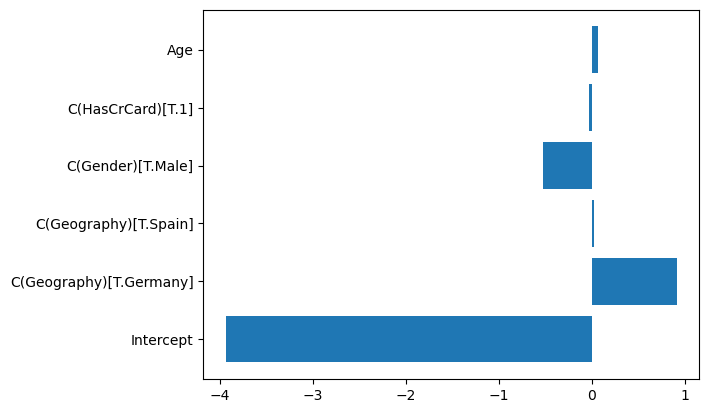

In [29]:
import matplotlib.pyplot as plt 
s = plt.barh(logit_coeffs['Coef.'].index, logit_coeffs['Coef.'])
s

In [34]:
fig = px.bar(ct, x=logit_coeffs['Coef.'],\
             y=logit_coeffs['Coef.'].index,
             orientation="h",
             color_discrete_sequence=['lightseagreen'] )

fig.update_layout(
                   plot_bgcolor='#F0E9E6',
                   title='Feature Importances',
                   xaxis_title='Coefficient Importance',
                   yaxis_title='Features', 
                   xaxis_showgrid=False, 
                   yaxis_showgrid=False
)

fig.show()

Intercept                  0.234517
C(Geography)[T.Germany]    0.118604
C(Geography)[T.Spain]      0.135904
C(Gender)[T.Male]          0.104132
C(HasCrCard)[T.1]          0.113504
Age                        0.004734
dtype: float64

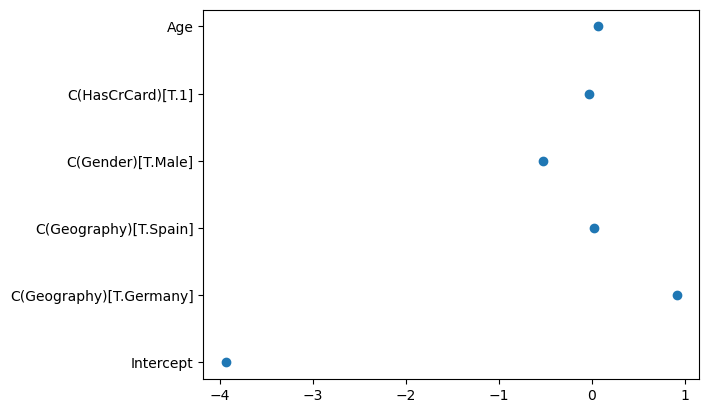

In [35]:
m = plt.scatter(logit_coeffs['Coef.'], logit_coeffs['Coef.'].index, )
logit_coeffs['0.975]'] - logit_coeffs['Coef.']

In [36]:
layout = go.Layout(plot_bgcolor='#F0E9E6')
fig = go.Figure(layout=layout)

fig.add_trace(
    go.Scatter(
    x=logit_coeffs['Coef.'],
    y=logit_coeffs['Coef.'].index,
    line=dict(color='#42C4F7', width=2),
    mode='markers',
        
    error_x=dict(
            type='data',
            symmetric=False,
            array=logit_coeffs['0.975]'] - logit_coeffs['Coef.'],
            arrayminus=logit_coeffs['Coef.'] - logit_coeffs['[0.025'],
            color='#8793c4')
        )
    )


fig.update_layout(
                   title='Regression Meta Analysis',
                   xaxis_title='Weight Estimates',
                   yaxis_title='Variable', 
                   xaxis_showgrid=False, 
                   yaxis_showgrid=False
)

fig.show()

In [40]:
d = pd.get_dummies(df[non_categorical_cols+categorical_cols],\
               columns=["Geography"])

d


Age  Gender  HasCrCard  Geography_France  Geography_Germany  \
0      42  Female          1                 1                  0   
1      41  Female          0                 0                  0   
2      42  Female          1                 1                  0   
3      39  Female          0                 1                  0   
4      43  Female          1                 0                  0   
...   ...     ...        ...               ...                ...   
9995   39    Male          1                 1                  0   
9996   35    Male          1                 1                  0   
9997   36  Female          0                 1                  0   
9998   42    Male          1                 0                  1   
9999   28  Female          1                 1                  0   

      Geography_Spain  
0                   0  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
9995                0  
9996                0  
9997                0  
9998                0  
9999                0  

[10000 rows x 6 columns]

In [44]:
dummy_encoded_df = pd.get_dummies(df[non_categorical_cols+categorical_cols],\
               columns=["Geography"])

dummy_encoded_df = dummy_encoded_df[["HasCrCard", "Age", "Gender",
                                      "Geography_Germany", "Geography_Spain",	\
                                      "Geography_France",
                                      ]]
dummy_encoded_df["Gender"] = dummy_encoded_df["Gender"].map({
    "Female":0, "Male":1
}) 
dummy_encoded_df.head()

HasCrCard  Age  Gender  Geography_Germany  Geography_Spain  \
0          1   42       0                  0                0   
1          0   41       0                  0                1   
2          1   42       0                  0                0   
3          0   39       0                  0                0   
4          1   43       0                  0                1   

   Geography_France  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0

In [53]:
#Compute effects
effects = dummy_encoded_df * logit_coeffs['Coef.'].to_numpy()
effects.head()
logit_coeffs['Coef.']

C(Geography)[T.Spain]      0.021798
C(HasCrCard)[T.1]         -0.031968
Age                        0.063294
C(Gender)[T.Male]         -0.529893
C(Geography)[T.Germany]    0.913702
Intercept                 -3.935134
Name: Coef., dtype: float64

In [60]:
layout = go.Layout(plot_bgcolor='#F0E9E6')

fig = go.Figure(layout=layout)

for each_col in effects.columns:
    fig.add_trace(go.Box(x=effects[each_col],\
                     marker_color = 'lightseagreen',
                     name=each_col))

fig.update_layout(
                   title='Effect Plot',
                   xaxis_title="Effects",
                   yaxis_title='Features', 
                   xaxis_showgrid=False, 
                   yaxis_showgrid=False
)

fig.show()

In [32]:
(df["proba"]>0.5).head(30)

#df.['RowNumber', 'CustomerId', 'Surname']

(df.loc[df["proba"]>0.5, ['RowNumber', 'CustomerId', 'Surname', 'proba']]).head(30)


RowNumber  CustomerId       Surname     proba
16          17    15737452         Romeo  0.521932
58          59    15623944         T'ien  0.557773
70          71    15703793    Konovalova  0.521932
85          86    15805254       Ndukaku  0.690354
104        105    15804919      Dunbabin  0.542108
135        136    15584518        Arthur  0.527801
158        159    15589975       Maclean  0.664933
179        180    15625426       Ashbolt  0.605346
230        231    15808473      Ringrose  0.523026
234        235    15704769         Smith  0.575809
243        244    15596175      McIntosh  0.658683
252        253    15793726     Matveyeva  0.743669
310        311    15712287    Pokrovskii  0.749594
313        314    15797960       Skinner  0.663955
347        348    15747358       Russell  0.537698
371        372    15774696          Cole  0.848855
385        386    15720910         Black  0.552389
399        400    15646372     Outhwaite  0.552389
416        417    15720559         Heath  0.698366
420        421    15810418         T'ang  0.677928
430        431    15597602  Nwachinemelu  0.506122
489        490    15807709         Kirby  0.605346
538        539    15794142      Ferreira  0.711529
559        560    15571816       Ritchie  0.619000
567        568    15689614          Teng  0.510559
584        585    15803689         Begum  0.551463
598        599    15637476   Alexandrova  0.642527
602        603    15782569         Stout  0.650688
609        610    15586585        Duncan  0.543543
612        613    15619857      Crawford  0.520923

In [62]:
SET_INDEX_DF = 16

local_data = dummy_encoded_df.iloc[SET_INDEX_DF,:]
local_effects =  effects.iloc[SET_INDEX_DF,:]
local_data, local_effects

(HasCrCard             1
 Age                  58
 Gender                1
 Geography_Germany     1
 Geography_Spain       0
 Geography_France      0
 Name: 16, dtype: int64,
 HasCrCard            -3.935134
 Age                  52.994703
 Gender                0.021798
 Geography_Germany    -0.529893
 Geography_Spain      -0.000000
 Geography_France      0.000000
 Name: 16, dtype: float64)

In [27]:
dummy_encoded_df.iloc[SET_INDEX_DF:SET_INDEX_DF+1,:].head()

HasCrCard  Age  Gender  Geography_Germany  Geography_Spain  \
16          1   58       1                  1                0   

    Geography_France  
16                 0

In [63]:
layout = go.Layout(plot_bgcolor='#F0E9E6')

fig = go.Figure(layout=layout)

for each_col in effects.columns:
    fig.add_trace(go.Box(x=effects[each_col],\
                     marker_color = 'lightseagreen',
                     name=each_col))


fig.add_trace(go.Scatter(
    x=local_effects.to_numpy(),
    y=local_effects.index,
    hovertext=local_data.to_numpy(),
    hoverinfo="text",
    marker=dict(
        color="red"
    ),
    mode="markers",
    marker_symbol="square-x",
    showlegend=False
))



fig.update_layout(
                   title=f'Local Effects of Data Point {SET_INDEX_DF},Predicted Log Odds-{df.iloc[SET_INDEX_DF,:]["proba"]}',
                   xaxis_title="Effects",
                   yaxis_title='Features', 
                   xaxis_showgrid=False, 
                   yaxis_showgrid=False
)

fig.show()

#### Task 1:  Write code for a customer for which the predicted log odds is lesser than 0.5. Create the box plot and provide interpretation.

#### Task 2:  Consider both the data point and its interpretation. What further interpretation you can derive in terms of how representative they are of the overall data distributions.

['x[3] <= 0.8',
 'gini = 0.0',
 'x[3] <= 1.75',
 'x[2] <= 4.95',
 'x[3] <= 1.65',
 'gini = 0.0',
 'gini = 0.0',
 'x[3] <= 1.55',
 'gini = 0.0',
 'x[2] <= 5.45',
 'gini = 0.0',
 'gini = 0.0',
 'x[2] <= 4.85',
 'x[1] <= 3.1',
 'gini = 0.0',
 'gini = 0.0',
 'gini = 0.0']

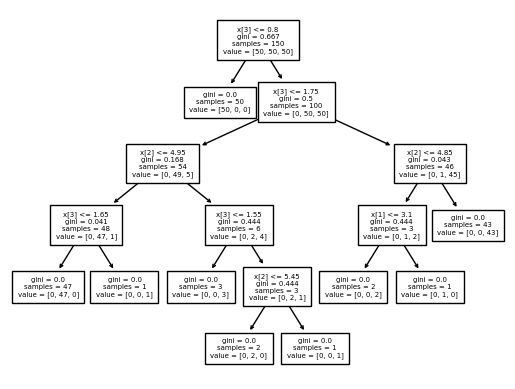

In [101]:
>>> from sklearn.datasets import load_iris
>>> from sklearn import tree

>>> clf = tree.DecisionTreeClassifier(random_state=0)
>>> iris = load_iris()

>>> clf = clf.fit(iris.data, iris.target)
>>> p = tree.plot_tree(clf, fontsize=5)

[x.get_text().split("\n")[0] for x in p]
